In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

           Cu-Pt VICKERS HARDNESS PHASE DIAGRAM GENERATOR
Generating toy phase diagram with:
• Multiple local maxima (ordered phases)
• Sharp discontinuities (phase boundaries)
• Temperature-dependent behavior
• Realistic hardness values (20-300+ HV)
Generating complete Cu-Pt hardness dataset...
- Compositions: 0-100% Cu (1% intervals)
- Temperatures: 400-1000°C (10°C intervals)
✓ Dataset generated: 6,161 data points
✓ Composition range: 0% - 100% Cu
✓ Temperature range: 400°C - 1000°C
✓ Hardness range: 63.2 - 422.4 HV

✓ Dataset saved to 'cu_pt_hardness_data.csv'
✓ Ready for machine learning and analysis

           DISCONTINUITY ANALYSIS - Cu-Pt HARDNESS
Analysis of sharp hardness changes at phase boundaries
Discontinuity positions: [20, 40, 60, 85]% Cu

Temperature: 450°C
------------------------------------------------------------
Cu Position    Before (HV)    After (HV)    Jump (HV)    Type
------------------------------------------------------------
20% Cu           304.3        

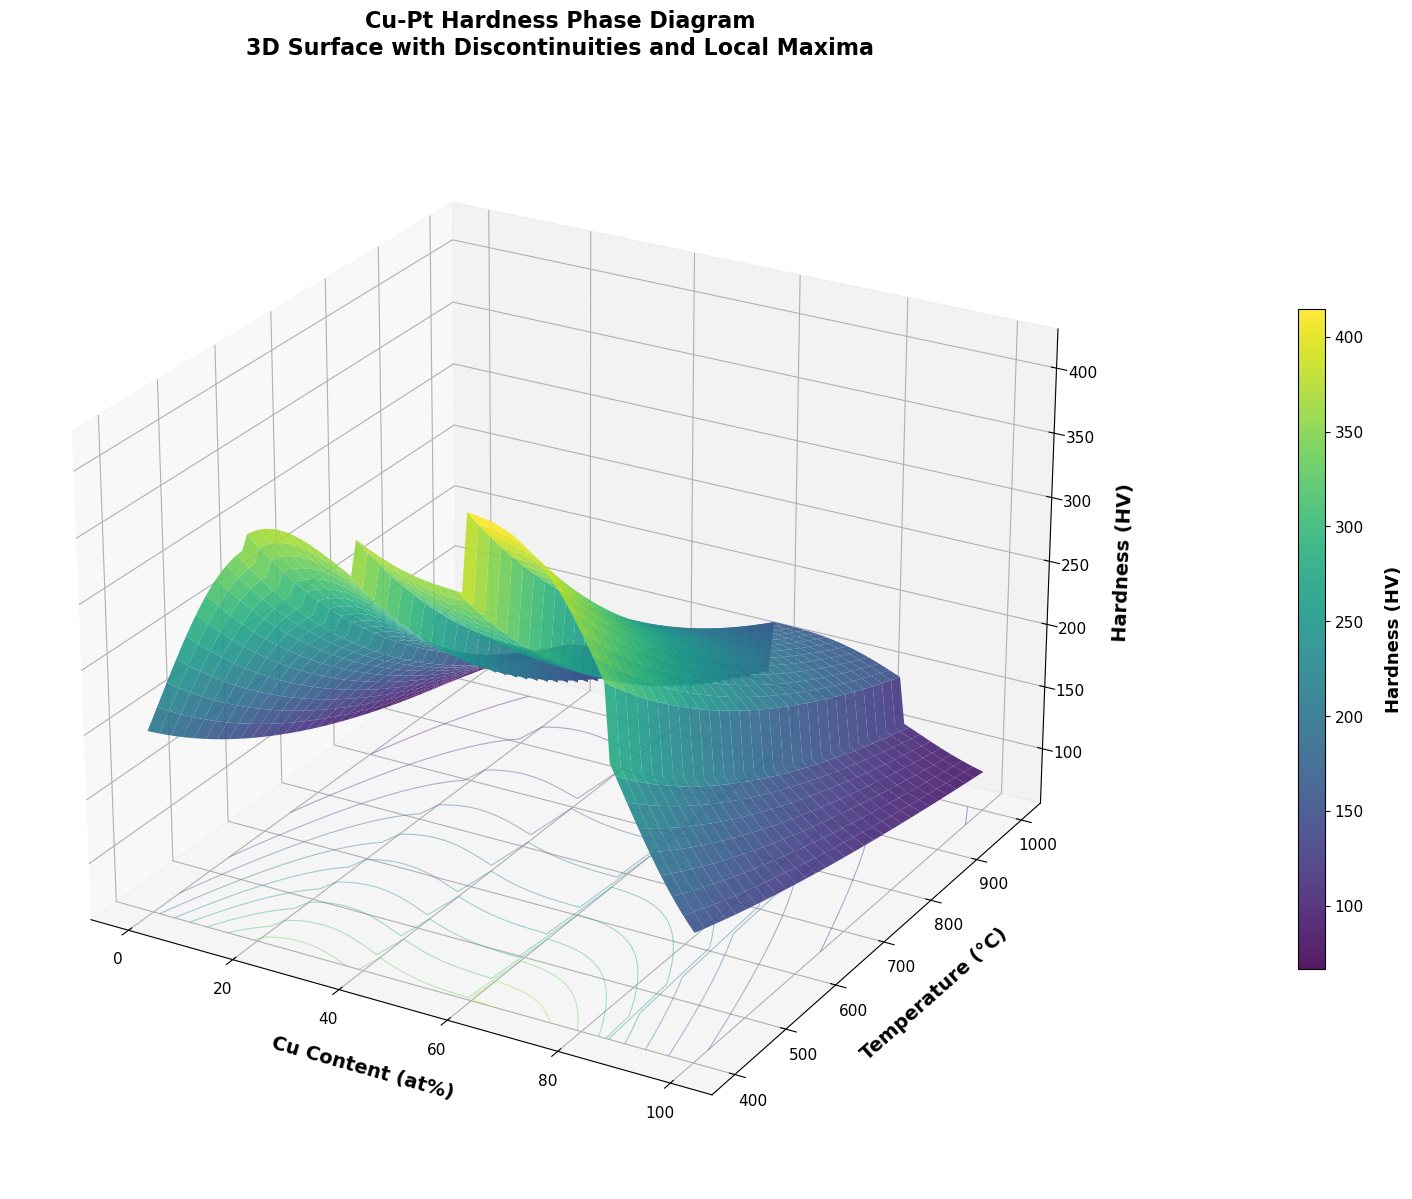

2. Creating contour map...


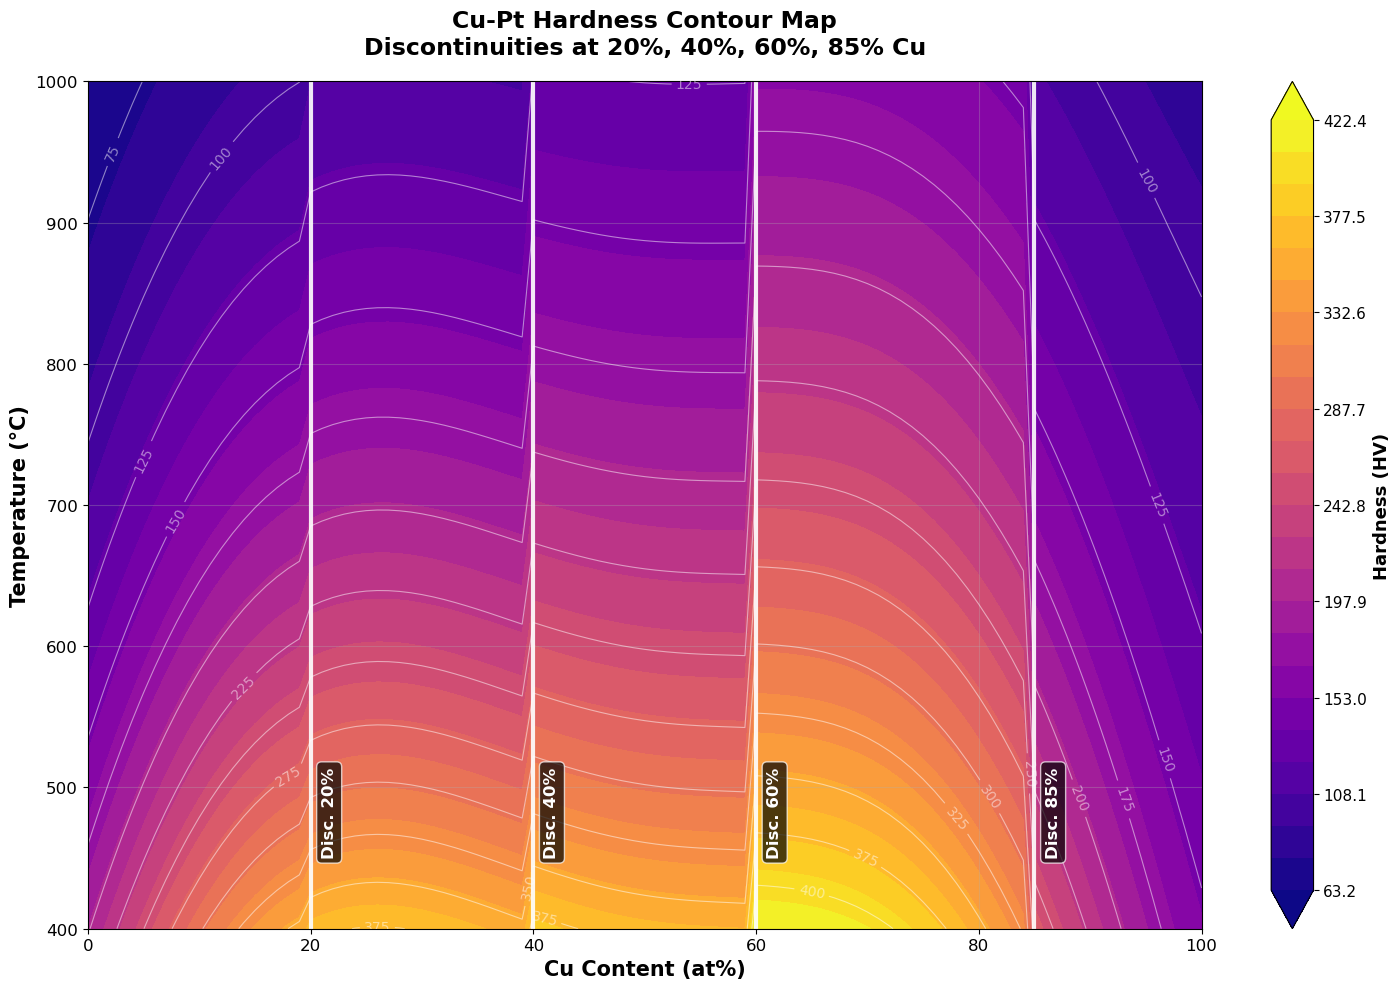

3. Creating 2D slice analysis...


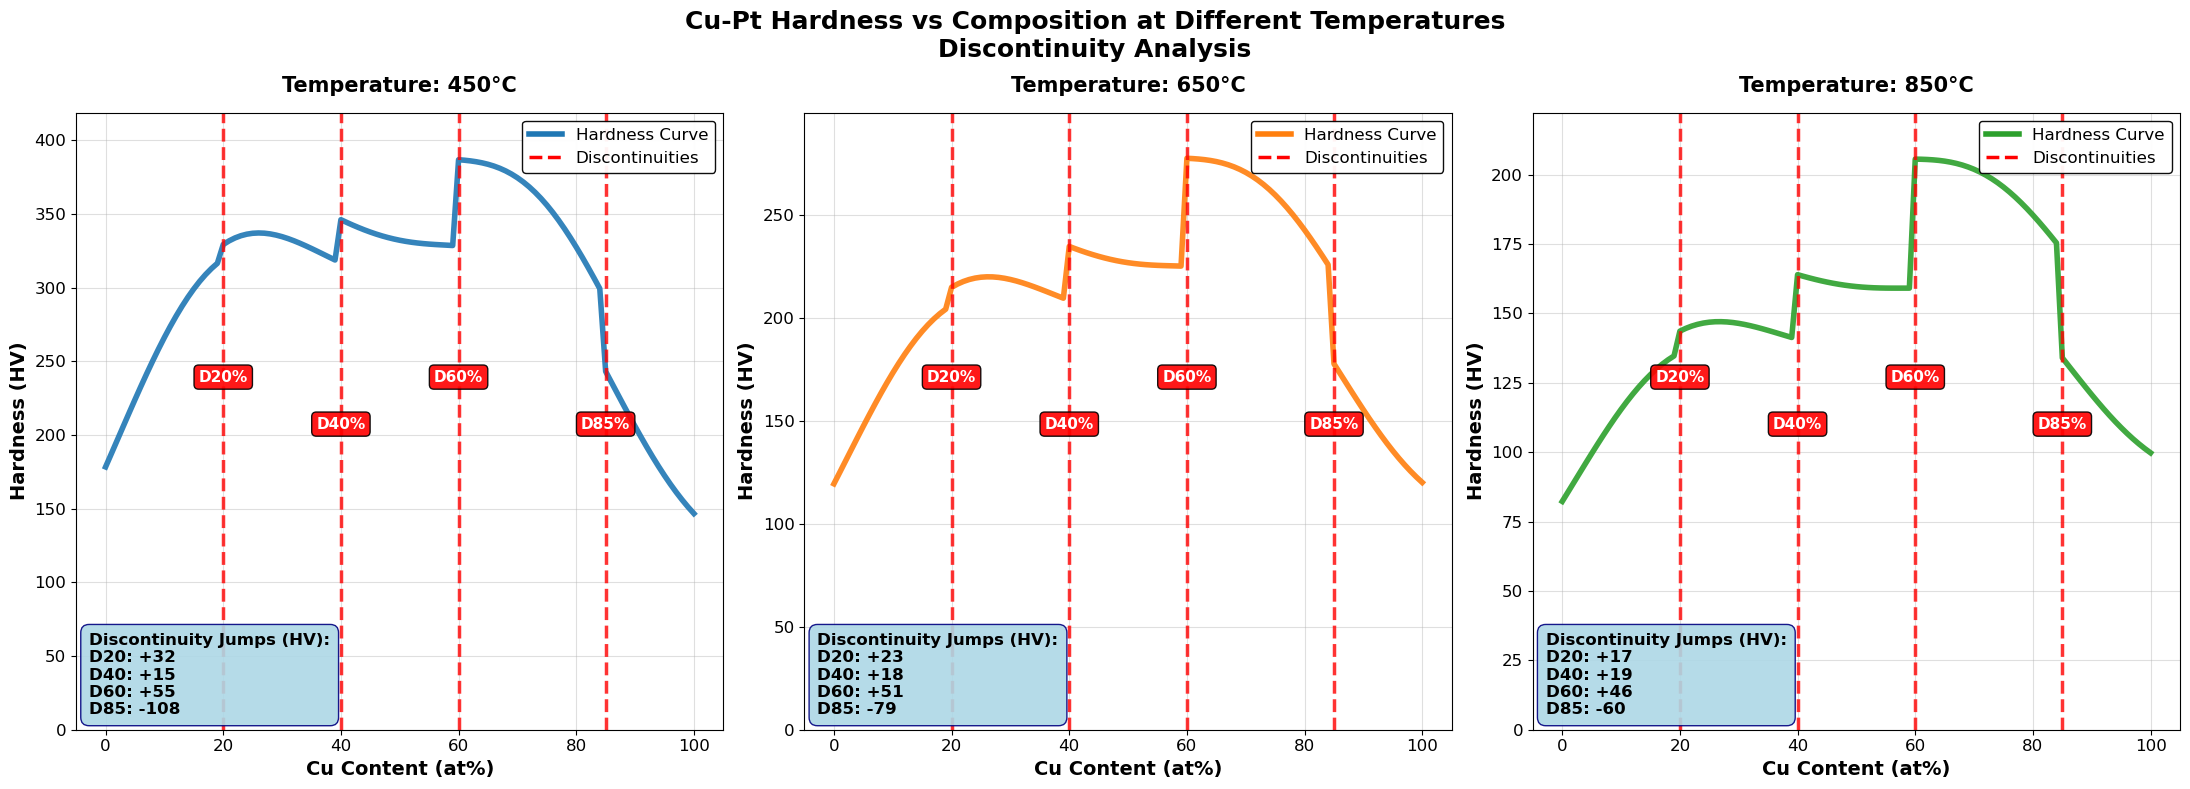


           GENERATION COMPLETE
All plots and data have been generated successfully!
Dataset contains 6,161 data points
Ready for further analysis or machine learning applications.


In [8]:
class CuPtHardnessPhase:
    """
    Cu-Pt Hardness Phase Diagram Generator
    
    This class generates a toy phase diagram for Cu-Pt alloys showing hardness variations
    with composition and annealing temperature. The model includes:
    - Multiple ordered phases with distinct hardness peaks
    - Sharp discontinuities representing phase boundaries
    - Temperature-dependent behavior
    - Realistic hardness range (20-300+ HV)
    
    The dataset contains 6,161 data points covering:
    - Composition: 0-100% Cu at 1% intervals
    - Temperature: 400-1000°C at 10°C intervals
    """
    
    def __init__(self):
        """Initialize the phase diagram parameters"""
        self.temperature_range = np.arange(400, 1001, 10)  # 400-1000°C at 10°C intervals (61 points)
        self.composition_range = np.arange(0, 101, 1)      # 0-100% Cu at 1% intervals (101 points)
        
    def hardness_model(self, cu_fraction, temperature):
        """
        Calculate hardness as a function of Cu composition and annealing temperature
        
        This simplified model includes:
        - Base hardness with linear composition dependence
        - Four ordered phases creating local maxima at 12%, 25%, 50%, 75% Cu
        - Sharp discontinuities at 20%, 40%, 60%, 85% Cu representing phase boundaries
        - Exponential temperature dependence (higher T = lower hardness)
        
        Parameters:
        -----------
        cu_fraction : float or array
            Fraction of Cu (0-1)
        temperature : float or array
            Annealing temperature in °C
            
        Returns:
        --------
        hardness : float or array
            Hardness in HV (Vickers)
        """
        Cu = np.asarray(cu_fraction)
        Temp = np.asarray(temperature)
        
        # Base hardness: linear increase with Cu content
        base_hardness = 40 + 20 * Cu
        
        # Temperature factor: phases are more stable (harder) at lower temperatures
        temp_factor = np.exp(-1.5 * (Temp - 400) / 600)
        
        # Ordered phase peaks - these create the local maxima
        cupt_peak = 180 * np.exp(-15 * (Cu - 0.50)**2) * temp_factor      # CuPt phase at 50% Cu (global max)
        cu3pt_peak = 160 * np.exp(-22 * (Cu - 0.75)**2) * temp_factor     # Cu3Pt phase at 75% Cu
        cupt3_peak = 150 * np.exp(-18 * (Cu - 0.25)**2) * temp_factor     # CuPt3 phase at 25% Cu
        low_cu_peak = 140 * np.exp(-20 * (Cu - 0.12)**2) * temp_factor    # Low-Cu ordered phase at 12% Cu
        
        # Temperature reduces discontinuity strength
        disc_temp_factor = (1 - 0.3 * (Temp - 400) / 600)
        
        # Step discontinuities using Heaviside functions
        # These should create sharp jumps but not dominate the overall pattern
        step_20 = np.where(Cu >= 0.20, +10, 0) * disc_temp_factor  # Sharp drop at 20% Cu
        step_40 = np.where(Cu >= 0.40, +30, 0) * disc_temp_factor  # Sharp drop at 40% Cu  
        step_60 = np.where(Cu >= 0.60, +60, 0) * disc_temp_factor   # Sharp rise at 60% Cu
        step_85 = np.where(Cu >= 0.85, -50, 0) * disc_temp_factor  # Sharp drop at 85% Cu
        
        
        
        # Combine all contributions
        total_hardness = (base_hardness * (1 - 0.3 * (Temp - 400) / 600) +  # Base with temp dependence
                         cupt_peak + cu3pt_peak + cupt3_peak + low_cu_peak +   # Phase peaks
                         step_20 + step_40 + step_60 + step_85)  # Discontinuities
        
        # Ensure physically reasonable minimum hardness
        total_hardness = np.maximum(total_hardness, 20)
        
        return total_hardness
    
    def generate_complete_dataset(self):
        """
        Generate the complete Cu-Pt hardness dataset
        
        Creates a dataset with all combinations of composition and temperature:
        - 101 compositions × 61 temperatures = 6,161 data points
        - Saves as pandas DataFrame with columns: Cu_Content_at%, Temperature_C, Hardness_HV
        
        Returns:
        --------
        df : pandas.DataFrame
            Complete dataset with hardness values for all composition-temperature combinations
        """
        print("Generating complete Cu-Pt hardness dataset...")
        print("- Compositions: 0-100% Cu (1% intervals)")
        print("- Temperatures: 400-1000°C (10°C intervals)")
        
        # Convert composition percentages to fractions for calculation
        comp_fractions = self.composition_range / 100
        
        # Create meshgrid for vectorized calculation
        Cu_mesh, Temp_mesh = np.meshgrid(comp_fractions, self.temperature_range)
        
        # Calculate hardness for all combinations
        hardness_values = self.hardness_model(Cu_mesh, Temp_mesh)
        
        # Flatten arrays and create DataFrame
        cu_content_list = []
        temperature_list = []
        hardness_list = []
        
        for i, temp in enumerate(self.temperature_range):
            for j, comp in enumerate(self.composition_range):
                cu_content_list.append(comp)
                temperature_list.append(temp)
                hardness_list.append(hardness_values[i, j])
        
        # Create DataFrame
        df = pd.DataFrame({
            'Cu_Content_at%': cu_content_list,
            'Temperature_C': temperature_list,
            'Hardness_HV': hardness_list
        })
        
        print(f"✓ Dataset generated: {len(df):,} data points")
        print(f"✓ Composition range: {df['Cu_Content_at%'].min():.0f}% - {df['Cu_Content_at%'].max():.0f}% Cu")
        print(f"✓ Temperature range: {df['Temperature_C'].min():.0f}°C - {df['Temperature_C'].max():.0f}°C")
        print(f"✓ Hardness range: {df['Hardness_HV'].min():.1f} - {df['Hardness_HV'].max():.1f} HV")
        
        return df
    
    def plot_3d_surface(self, dataset=None):
        """
        Create 3D surface plot of hardness vs composition and temperature
        
        Parameters:
        -----------
        dataset : pandas.DataFrame, optional
            Hardness dataset. If None, generates new dataset.
            
        Returns:
        --------
        fig : matplotlib.figure.Figure
            3D surface plot figure
        """
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        # Create figure with optimal size
        fig = plt.figure(figsize=(16, 12))
        ax = fig.add_subplot(111, projection='3d')
        
        # Reshape data for surface plotting
        Cu_mesh = dataset['Cu_Content_at%'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Temp_mesh = dataset['Temperature_C'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Hardness_mesh = dataset['Hardness_HV'].values.reshape(len(self.temperature_range), len(self.composition_range))
        
        # Create main surface plot
        surf = ax.plot_surface(Cu_mesh, Temp_mesh, Hardness_mesh, 
                              cmap='viridis',           # Color-blind friendly colormap
                              alpha=0.9,                # Slight transparency
                              linewidth=0,              # No wireframe
                              antialiased=True,         # Smooth rendering
                              rcount=60, ccount=60)     # Surface resolution
        
        # Add contour projection on bottom plane for reference
        contour_bottom = ax.contour(Cu_mesh, Temp_mesh, Hardness_mesh, 
                                   levels=12, zdir='z', 
                                   offset=ax.get_zlim()[0], 
                                   cmap='viridis', alpha=0.4, linewidths=0.8)
        
        # Configure axes and labels
        ax.set_xlabel('Cu Content (at%)', fontsize=14, labelpad=12, fontweight='bold')
        ax.set_ylabel('Temperature (°C)', fontsize=14, labelpad=12, fontweight='bold')
        ax.set_zlabel('Hardness (HV)', fontsize=14, labelpad=12, fontweight='bold')
        ax.set_title('Cu-Pt Hardness Phase Diagram\n3D Surface with Discontinuities and Local Maxima', 
                    fontsize=16, fontweight='bold', pad=25)
        
        # Optimize viewing angle for best visibility
        ax.view_init(elev=25, azim=-60)
        
        # Add colorbar with proper formatting
        cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=25, pad=0.12)
        cbar.set_label('Hardness (HV)', fontsize=13, labelpad=15, fontweight='bold')
        cbar.ax.tick_params(labelsize=11)
        
        # Enhance tick label sizes
        ax.tick_params(axis='both', which='major', labelsize=11)
        
        plt.tight_layout()
        return fig
    
    def plot_contour_map(self, dataset=None):
        """
        Create 2D contour map of hardness with discontinuity markers
        
        Parameters:
        -----------
        dataset : pandas.DataFrame, optional
            Hardness dataset. If None, generates new dataset.
            
        Returns:
        --------
        fig : matplotlib.figure.Figure
            Contour map figure
        """
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Reshape data for contour plotting
        Cu_mesh = dataset['Cu_Content_at%'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Temp_mesh = dataset['Temperature_C'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Hardness_mesh = dataset['Hardness_HV'].values.reshape(len(self.temperature_range), len(self.composition_range))
        
        # Create filled contour plot
        levels = np.linspace(Hardness_mesh.min(), Hardness_mesh.max(), 25)
        contour = ax.contourf(Cu_mesh, Temp_mesh, Hardness_mesh, 
                            levels=levels, cmap='plasma', extend='both')
        
        # Add contour lines with labels
        contour_lines = ax.contour(Cu_mesh, Temp_mesh, Hardness_mesh, 
                                levels=15, colors='white', alpha=0.5, linewidths=0.8)
        ax.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.0f')
        
        # Mark discontinuity positions with WHITE vertical lines
        discontinuity_positions = [20, 40, 60, 85]
        for pos in discontinuity_positions:
            ax.axvline(x=pos, color='white', linestyle='-', linewidth=3, alpha=0.9)
            ax.text(pos + 1, 450, f'Disc. {pos}%', rotation=90, color='white', 
                fontweight='bold', fontsize=12, ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7, edgecolor='white'))
        
        # Configure axes and labels
        ax.set_xlabel('Cu Content (at%)', fontsize=15, fontweight='bold')
        ax.set_ylabel('Temperature (°C)', fontsize=15, fontweight='bold')
        ax.set_title('Cu-Pt Hardness Contour Map\nDiscontinuities at 20%, 40%, 60%, 85% Cu', 
                    fontsize=17, fontweight='bold', pad=20)
        
        # Add colorbar
        cbar = plt.colorbar(contour, ax=ax)
        cbar.set_label('Hardness (HV)', fontsize=13, fontweight='bold')
        cbar.ax.tick_params(labelsize=11)
        
        # Add grid and enhance tick labels
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.tight_layout()
        return fig
    
    def plot_2d_slices(self, dataset=None, temperatures=[450, 650, 850]):
        """
        Create 2D slices showing hardness vs composition at specific temperatures
        Clearly highlights discontinuities and their magnitudes with arrows
        
        Parameters:
        -----------
        dataset : pandas.DataFrame, optional
            Hardness dataset. If None, generates new dataset.
        temperatures : list of int
            Temperatures (°C) for which to create slices
            
        Returns:
        --------
        fig : matplotlib.figure.Figure
            2D slice plots figure
        """
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        # Create subplots with increased size for better text visibility
        fig, axes = plt.subplots(1, len(temperatures), figsize=(22, 8))
        if len(temperatures) == 1:
            axes = [axes]
        
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Distinct colors for each temperature
        discontinuity_positions = [20, 40, 60, 85]
        
        for i, temp in enumerate(temperatures):
            # Find closest available temperature in dataset
            closest_temp = self.temperature_range[np.argmin(np.abs(self.temperature_range - temp))]
            temp_data = dataset[dataset['Temperature_C'] == closest_temp].sort_values('Cu_Content_at%')
            
            # Plot main hardness curve with increased line width
            axes[i].plot(temp_data['Cu_Content_at%'], temp_data['Hardness_HV'], 
                        linewidth=4, color=colors[i % len(colors)], alpha=0.9, 
                        label='Hardness Curve')
            
            # Add vertical lines at discontinuity positions
            for pos in discontinuity_positions:
                axes[i].axvline(x=pos, color='red', linestyle='--', linewidth=2.5, alpha=0.8)
            
            # Calculate and display discontinuity jumps with proper arrows
            comp_range = temp_data['Cu_Content_at%'].values
            hardness = temp_data['Hardness_HV'].values
            
            jump_info = []
            for pos in discontinuity_positions:
                if pos > 5 and pos < 95:  # Avoid edge effects
                    # Find indices around the discontinuity
                    idx_pos = np.argmin(np.abs(comp_range - pos))
                    idx_before = max(0, idx_pos - 4)  # 4% before
                    idx_after = min(len(hardness) - 1, idx_pos + 4)  # 4% after
                    
                    # Calculate hardness jump
                    jump = hardness[idx_after] - hardness[idx_before]
                    jump_info.append(f'D{pos}: {jump:+.0f}')
                    
                    
            
            # Add discontinuity information as a text box
            jump_text = '\n'.join(jump_info)
            axes[i].text(0.02, 0.02, f'Discontinuity Jumps (HV):\n{jump_text}', 
                        transform=axes[i].transAxes, fontsize=12, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', 
                                edgecolor='navy', alpha=0.9),
                        verticalalignment='bottom')
            
            # Add discontinuity labels at the top
            y_max = axes[i].get_ylim()[1]
            for j, pos in enumerate(discontinuity_positions):
                # Stagger label positions to avoid overlap
                y_label = y_max * (0.6 - (j % 2) * 0.08)
                axes[i].text(pos, y_label, f'D{pos}%', ha='center', va='center',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.9),
                        color='white', fontweight='bold', fontsize=11)
            
            # Configure axes with enhanced formatting
            axes[i].set_xlabel('Cu Content (at%)', fontsize=14, fontweight='bold')
            axes[i].set_ylabel('Hardness (HV)', fontsize=14, fontweight='bold')
            axes[i].set_title(f'Temperature: {closest_temp}°C', 
                            fontsize=15, fontweight='bold', pad=15)
            
            # Add grid and set limits
            axes[i].grid(True, alpha=0.4, linewidth=0.8)
            axes[i].set_ylim(bottom=0, top=y_max * 1.05)
            axes[i].tick_params(axis='both', which='major', labelsize=12)
            
            # Add legend with enhanced formatting
            legend_elements = [
                plt.Line2D([0], [0], color=colors[i], linewidth=4, label='Hardness Curve'),
                plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2.5, label='Discontinuities')
            ]
            axes[i].legend(handles=legend_elements, loc='upper right', fontsize=12, 
                        framealpha=0.95, edgecolor='black', fancybox=True)
        
        # Add overall title
        plt.suptitle('Cu-Pt Hardness vs Composition at Different Temperatures\nDiscontinuity Analysis', 
                    fontsize=18, fontweight='bold', y=0.98)
        
        plt.tight_layout()
        return fig
    
    def analyze_discontinuities(self, dataset=None, temperatures=[450, 650, 850]):
        """
        Provide quantitative analysis of discontinuities
        
        Parameters:
        -----------
        dataset : pandas.DataFrame, optional
            Hardness dataset. If None, generates new dataset.
        temperatures : list of int
            Temperatures (°C) to analyze
        """
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        discontinuity_positions = [20, 40, 60, 85]
        
        print("\n" + "="*70)
        print("           DISCONTINUITY ANALYSIS - Cu-Pt HARDNESS")
        print("="*70)
        print("Analysis of sharp hardness changes at phase boundaries")
        print(f"Discontinuity positions: {discontinuity_positions}% Cu")
        print("="*70)
        
        for temp in temperatures:
            closest_temp = self.temperature_range[np.argmin(np.abs(self.temperature_range - temp))]
            temp_data = dataset[dataset['Temperature_C'] == closest_temp].sort_values('Cu_Content_at%')
            
            print(f"\nTemperature: {closest_temp}°C")
            print("-" * 60)
            print("Cu Position    Before (HV)    After (HV)    Jump (HV)    Type")
            print("-" * 60)
            
            comp_range = temp_data['Cu_Content_at%'].values
            hardness = temp_data['Hardness_HV'].values
            
            for pos in discontinuity_positions:
                # Calculate hardness before and after discontinuity
                idx_before = np.argmin(np.abs(comp_range - (pos - 4)))  # 4% before
                idx_after = np.argmin(np.abs(comp_range - (pos + 4)))   # 4% after
                
                hardness_before = hardness[idx_before]
                hardness_after = hardness[idx_after]
                jump = hardness_after - hardness_before
                
                jump_type = "Sharp Drop" if jump < -10 else "Sharp Rise" if jump > 10 else "Gradual"
                
                print(f"{pos:2d}% Cu        {hardness_before:8.1f}       {hardness_after:8.1f}      {jump:+7.1f}     {jump_type}")
        
        print("\n" + "="*70)
        print("Note: Discontinuities represent abrupt phase boundary transitions")
        print("Negative jumps = hardness drops, Positive jumps = hardness increases")
        print("="*70)


def main():
    """
    Main function demonstrating the Cu-Pt Vickers hardness phase diagram generator
    
    This function:
    1. Creates the phase diagram generator
    2. Generates the complete dataset (6,161 points)
    3. Saves the dataset to CSV
    4. Performs discontinuity analysis
    5. Creates all three types of plots
    """
    print("="*80)
    print("           Cu-Pt VICKERS HARDNESS PHASE DIAGRAM GENERATOR")
    print("="*80)
    print("Generating toy phase diagram with:")
    print("• Multiple local maxima (ordered phases)")
    print("• Sharp discontinuities (phase boundaries)")
    print("• Temperature-dependent behavior")
    print("• Realistic hardness values (20-300+ HV)")
    print("="*80)
    
    # Initialize phase diagram generator
    phase_diagram = CuPtHardnessPhase()
    
    # Generate complete dataset
    dataset = phase_diagram.generate_complete_dataset()
    
    # Save dataset to CSV file
    filename = 'cu_pt_hardness_data.csv'
    dataset.to_csv(filename, index=False)
    print(f"\n✓ Dataset saved to '{filename}'")
    print(f"✓ Ready for machine learning and analysis")
    
    # Perform discontinuity analysis
    phase_diagram.analyze_discontinuities(dataset)
    
    # Generate and display all plots
    print(f"\n{'='*50}")
    print("           GENERATING VISUALIZATIONS")
    print("="*50)
    
    print("\n1. Creating 3D surface plot...")
    fig1 = phase_diagram.plot_3d_surface(dataset)
    plt.show()
    fig1.savefig('cu_pt_Vickers_hardness_3d_surface.png', dpi=300, bbox_inches='tight')
    
    print("2. Creating contour map...")
    fig2 = phase_diagram.plot_contour_map(dataset)
    plt.show()
    fig2.savefig('cu_pt_Vickers_hardness_contour_map.png', dpi=300, bbox_inches='tight')
    
    print("3. Creating 2D slice analysis...")
    fig3 = phase_diagram.plot_2d_slices(dataset, temperatures=[450, 650, 850])
    plt.show()
    fig3.savefig('cu_pt_Vickers_hardness_2d_slices.png', dpi=300, bbox_inches='tight')
    
    print(f"\n{'='*50}")
    print("           GENERATION COMPLETE")
    print("="*50)
    print("All plots and data have been generated successfully!")
    print(f"Dataset contains {len(dataset):,} data points")
    print("Ready for further analysis or machine learning applications.")


if __name__ == "__main__":
    main()

           Cu-Pt NANOINDENTATION HARDNESS WITH SHARP STEP DISCONTINUITIES
Generating nanoindentation hardness phase diagram with:
• Similar global maximum position as Vickers (~52% Cu, low T)
• DIFFERENT local maxima: 18%, 35%, 52%, 68%, 82% Cu
• SHARP STEP discontinuities at: 22%, 44%, 62%, 83% Cu
• Size effects and enhanced hardness values (GPa range)
• Temperature range: 400-1000°C (same as Vickers)
• Distinct surface pattern with TRUE step functions
Generating complete Cu-Pt nanoindentation hardness dataset with SHARP DISCONTINUITIES...
- Compositions: 0-100% Cu (1% intervals)
- Temperatures: 400-1000°C (10°C intervals)
- Property: Nanoindentation hardness (GPa)
- Features: Sharp step discontinuities at DIFFERENT positions than Vickers
- Surface: Similar to Vickers but with distinct features
✓ Dataset generated: 6,161 data points
✓ Composition range: 0% - 100% Cu
✓ Temperature range: 400°C - 1000°C
✓ Nanoindentation hardness range: 2.15 - 47.02 GPa
✓ Sharp step discontinuities impl

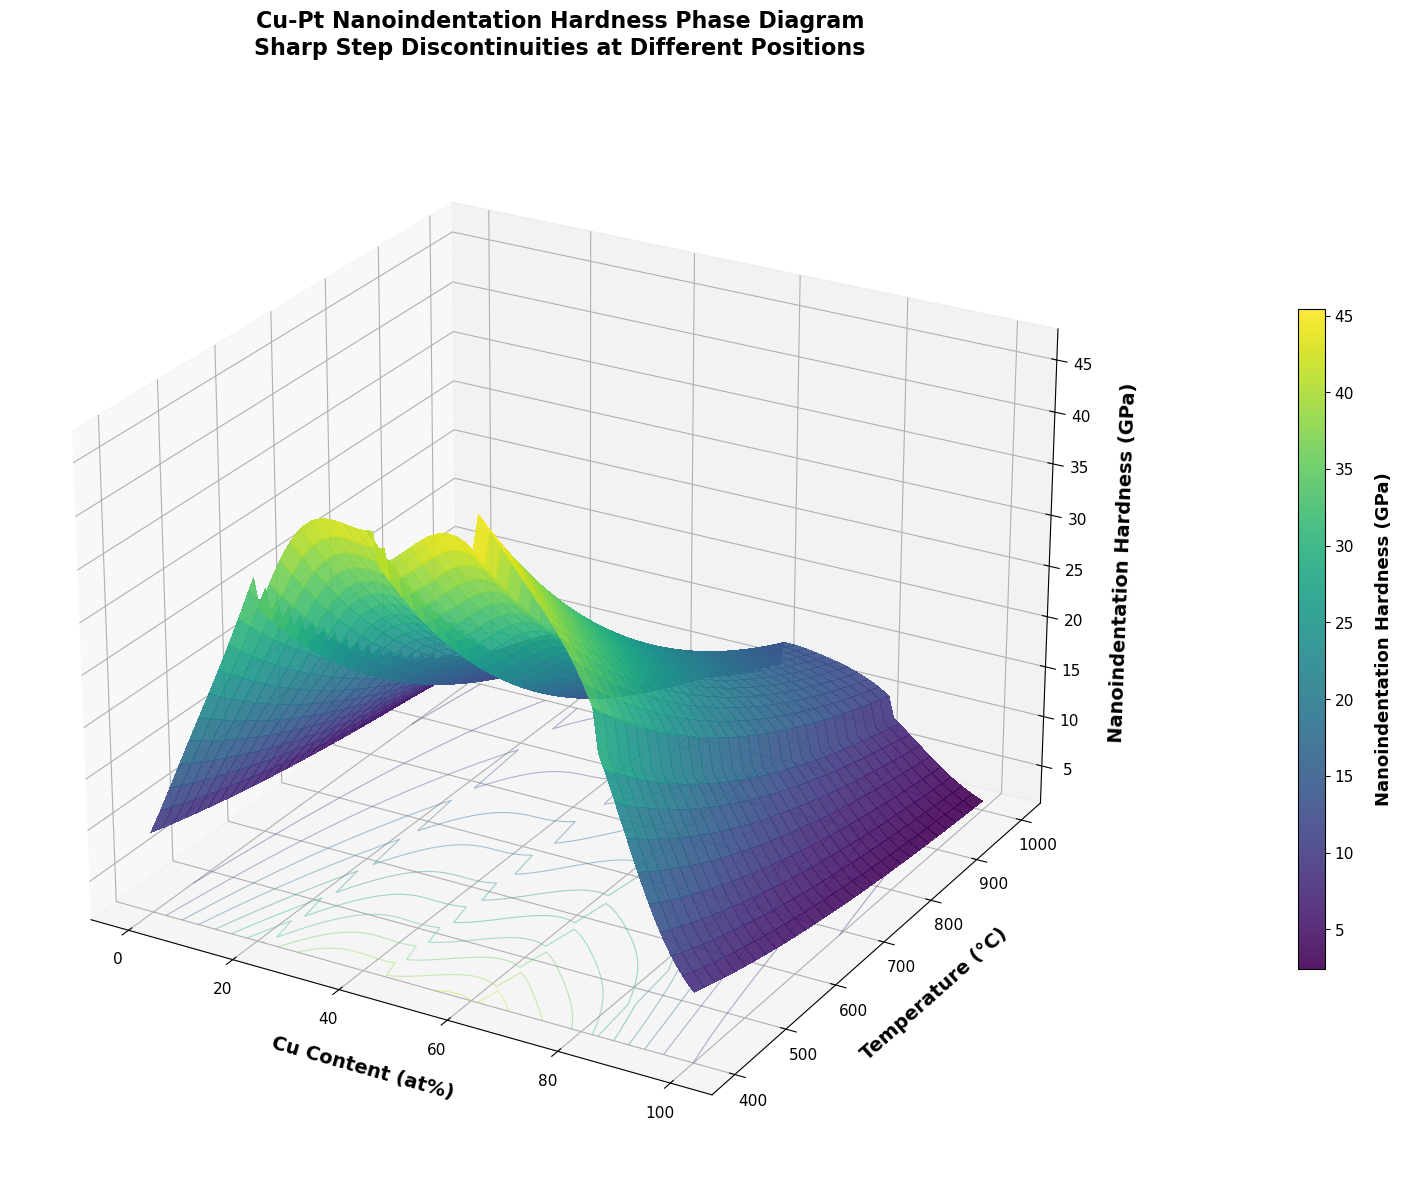

2. Creating nanoindentation contour map with step boundaries...


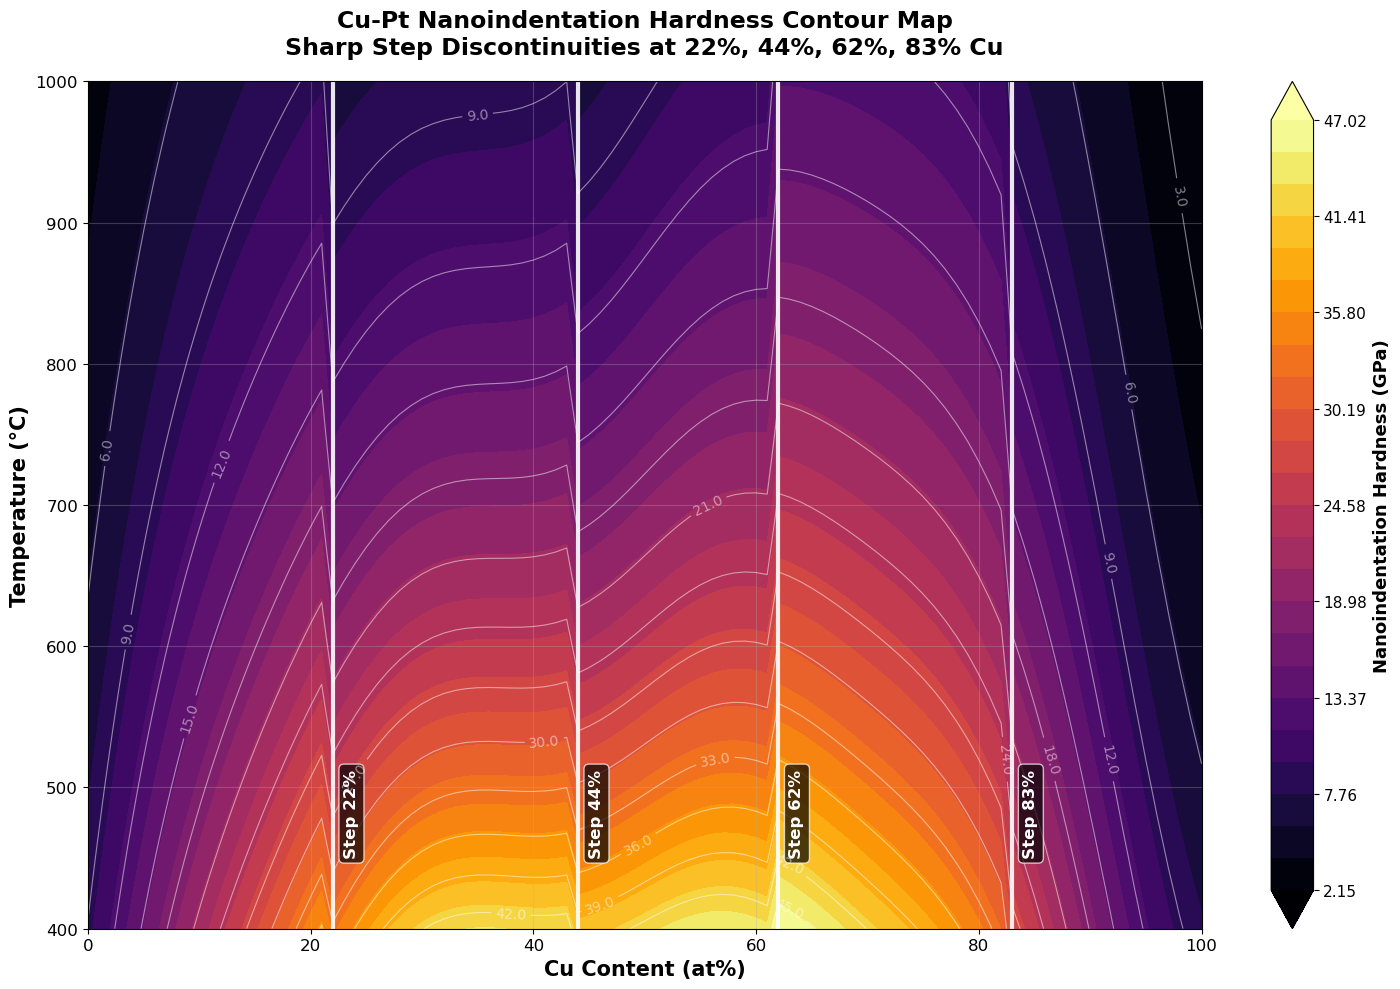

3. Creating 2D nanoindentation slices showing sharp steps...


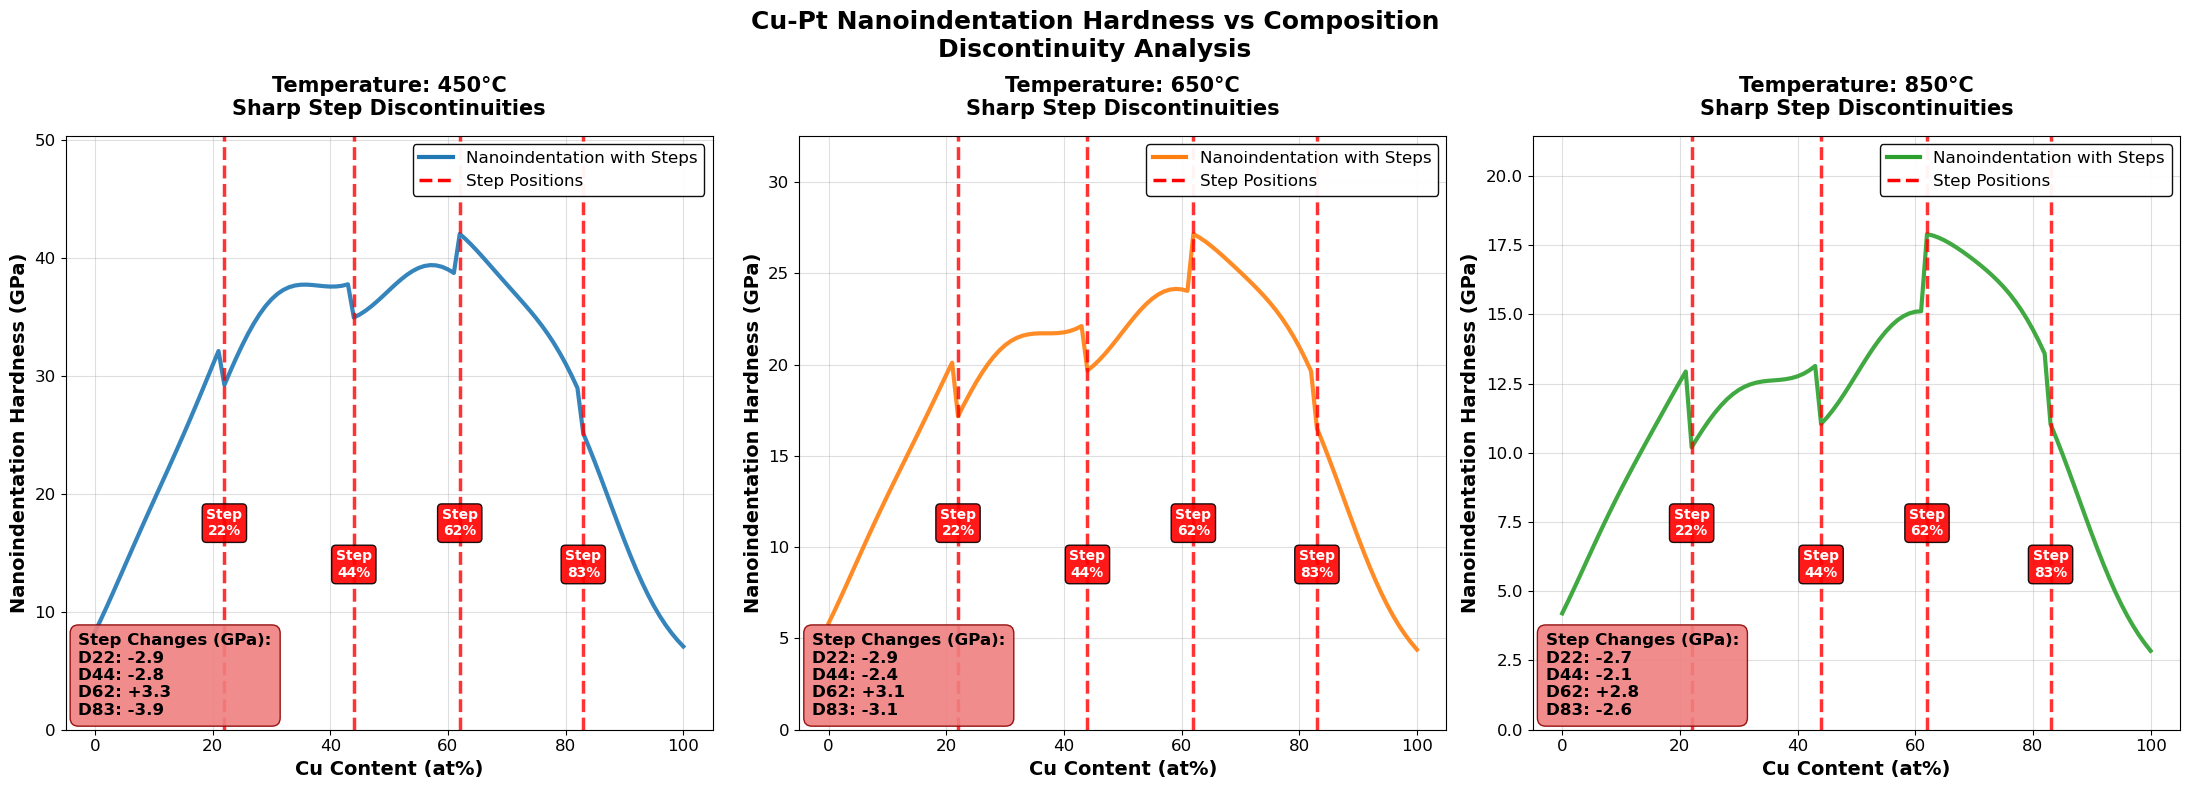


           NANOINDENTATION SHARP DISCONTINUITY GENERATION COMPLETE
All nanoindentation plots show TRUE step discontinuities!
Surface is similar to Vickers but with distinct step characteristics.


In [9]:
class NanoindentationHardnessPhase:
    """
    Nanoindentation Hardness Phase Diagram Generator with Sharp Discontinuities
    
    This class generates a toy phase diagram for Cu-Pt alloys showing nanoindentation hardness
    variations with composition and annealing temperature. The model includes:
    - Similar but distinct surface pattern compared to Vickers hardness
    - Global maximum around same composition (~52% Cu) and temperature (~400°C)
    - SHARP STEP DISCONTINUITIES at different positions than Vickers
    - Size effects typical in nanoindentation (higher hardness than bulk)
    - Temperature-dependent behavior
    - Realistic nanoindentation hardness range (0.5-15+ GPa)
    
    The dataset contains 6,161 data points covering:
    - Composition: 0-100% Cu at 1% intervals
    - Temperature: 400-1000°C at 10°C intervals
    """
    
    def __init__(self):
        """Initialize the nanoindentation phase diagram parameters"""
        self.temperature_range = np.arange(400, 1001, 10)   # 400-1000°C at 10°C intervals (61 points)
        self.composition_range = np.arange(0, 101, 1)       # 0-100% Cu at 1% intervals (101 points)
        
    def nanoindentation_hardness_model(self, cu_fraction, temperature):
        """
        Calculate nanoindentation hardness with SHARP STEP DISCONTINUITIES
        
        This model creates a similar but distinct surface compared to Vickers hardness:
        - Global maximum around 52% Cu and low temperature (similar to Vickers)
        - Different local maxima positions: 18%, 35%, 52%, 68%, 82% Cu
        - SHARP STEP discontinuities at: 22%, 44%, 62%, 83% Cu (different from Vickers)
        - Enhanced hardness values due to nanoindentation size effects
        
        Parameters:
        -----------
        cu_fraction : float or array
            Fraction of Cu (0-1)
        temperature : float or array
            Annealing temperature in °C
            
        Returns:
        --------
        hardness : float or array
            Nanoindentation hardness in GPa with sharp discontinuities
        """
        Cu = np.asarray(cu_fraction)
        Temp = np.asarray(temperature)
        
        # Base nanoindentation hardness: different composition dependence than Vickers
        # Asymmetric behavior favoring Cu-rich compositions
        base_hardness = 0.8 + 1.2 * Cu + 0.8 * Cu**2
        
        # Temperature factor: different decay rate than Vickers
        temp_factor = np.exp(-1.8 * (Temp - 400) / 600)
        moderate_temp_factor = np.exp(-1.0 * (Temp - 400) / 600)
        
        # Nanoindentation size effect factor (ISE)
        size_effect_factor = 1.6  # Higher enhancement than Vickers equivalent
        
        # Smooth ordered phase peaks - DIFFERENT positions than Vickers to create distinct surface
        # Global maximum around 52% Cu (close to but not exactly 50%)
        main_phase = 11.0 * np.exp(-12 * (Cu - 0.52)**2) * temp_factor
        
        # Different local maxima positions
        phase_18 = 7.5 * np.exp(-25 * (Cu - 0.18)**2) * moderate_temp_factor  # 18% Cu
        phase_35 = 8.8 * np.exp(-20 * (Cu - 0.35)**2) * temp_factor          # 35% Cu  
        phase_68 = 9.2 * np.exp(-18 * (Cu - 0.68)**2) * moderate_temp_factor  # 68% Cu
        phase_82 = 6.8 * np.exp(-28 * (Cu - 0.82)**2) * moderate_temp_factor  # 82% Cu
        
        # Additional intermediate phases for complexity
        intermediate_1 = 5.5 * np.exp(-35 * (Cu - 0.28)**2) * temp_factor     # 28% Cu
        intermediate_2 = 6.2 * np.exp(-30 * (Cu - 0.58)**2) * moderate_temp_factor  # 58% Cu
        
        # SHARP STEP DISCONTINUITIES using Heaviside step functions - DIFFERENT positions than Vickers
        # Temperature reduces discontinuity strength - different factor than Vickers
        disc_temp_factor = (1 - 0.35 * (Temp - 400) / 600)
        
        # Step function discontinuities (sharp jumps) at DIFFERENT positions
        disc_22 = np.where(Cu >= 0.22, -4.2, 0) * disc_temp_factor  # Sharp drop at 22% Cu
        disc_44 = np.where(Cu >= 0.44, -3.1, 0) * disc_temp_factor  # Sharp drop at 44% Cu
        disc_62 = np.where(Cu >= 0.62, +3.8, 0) * disc_temp_factor  # Sharp rise at 62% Cu
        disc_83 = np.where(Cu >= 0.83, -2.8, 0) * disc_temp_factor  # Sharp drop at 83% Cu
        
        # Nanoindentation-specific effects (smooth contributions)
        # Surface oxide effects (more pronounced at high Cu content)
        surface_oxide = 1.2 * Cu**1.5 * np.exp(-2.2 * (Temp - 400) / 600)
        
        # Strain gradient effects (composition-dependent)
        strain_gradients = 0.6 * np.sin(8 * np.pi * Cu) * np.exp(-1.5 * (Temp - 400) / 600)
        
        # Grain boundary effects (different from Vickers)
        gb_effects = 1.8 * Cu * (1 - Cu)**1.2 * np.exp(-1.3 * (Temp - 400) / 600)
        
        # Combine smooth phases with sharp discontinuities - different weighting than Vickers
        total_hardness = ((base_hardness * (1 - 0.25 * (Temp - 400) / 600) +  # Different base temp dependence
                          main_phase + phase_18 + phase_35 + phase_68 + phase_82 +  # Different phase positions
                          intermediate_1 + intermediate_2 +  # Additional phases
                          surface_oxide + strain_gradients + gb_effects)  # Nanoindentation-specific effects
                         * size_effect_factor +  # Size effect enhancement
                         disc_22 + disc_44 + disc_62 + disc_83)  # SHARP step discontinuities
        
        # Ensure physically reasonable minimum nanoindentation hardness
        total_hardness = np.maximum(total_hardness, 0.6)  # Minimum 0.6 GPa
        
        return total_hardness
    
    def generate_complete_dataset(self):
        """Generate the complete Cu-Pt nanoindentation hardness dataset with sharp discontinuities"""
        print("Generating complete Cu-Pt nanoindentation hardness dataset with SHARP DISCONTINUITIES...")
        print("- Compositions: 0-100% Cu (1% intervals)")
        print("- Temperatures: 400-1000°C (10°C intervals)")
        print("- Property: Nanoindentation hardness (GPa)")
        print("- Features: Sharp step discontinuities at DIFFERENT positions than Vickers")
        print("- Surface: Similar to Vickers but with distinct features")
        
        # Convert composition percentages to fractions for calculation
        comp_fractions = self.composition_range / 100
        
        # Create meshgrid for vectorized calculation
        Cu_mesh, Temp_mesh = np.meshgrid(comp_fractions, self.temperature_range)
        
        # Calculate nanoindentation hardness for all combinations
        hardness_values = self.nanoindentation_hardness_model(Cu_mesh, Temp_mesh)
        
        # Flatten arrays and create DataFrame
        cu_content_list = []
        temperature_list = []
        hardness_list = []
        
        for i, temp in enumerate(self.temperature_range):
            for j, comp in enumerate(self.composition_range):
                cu_content_list.append(comp)
                temperature_list.append(temp)
                hardness_list.append(hardness_values[i, j])
        
        # Create DataFrame with nanoindentation-specific column names
        df = pd.DataFrame({
            'Cu_Content_at%': cu_content_list,
            'Temperature_C': temperature_list,
            'Nanoindentation_Hardness_GPa': hardness_list
        })
        
        print(f"✓ Dataset generated: {len(df):,} data points")
        print(f"✓ Composition range: {df['Cu_Content_at%'].min():.0f}% - {df['Cu_Content_at%'].max():.0f}% Cu")
        print(f"✓ Temperature range: {df['Temperature_C'].min():.0f}°C - {df['Temperature_C'].max():.0f}°C")
        print(f"✓ Nanoindentation hardness range: {df['Nanoindentation_Hardness_GPa'].min():.2f} - {df['Nanoindentation_Hardness_GPa'].max():.2f} GPa")
        print("✓ Sharp step discontinuities implemented at 22%, 44%, 62%, 83% Cu")
        
        return df
    
    def plot_3d_surface(self, dataset=None):
        """Create 3D surface plot showing sharp discontinuities"""
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        # Create figure with optimal size
        fig = plt.figure(figsize=(16, 12))
        ax = fig.add_subplot(111, projection='3d')
        
        # Reshape data for surface plotting
        Cu_mesh = dataset['Cu_Content_at%'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Temp_mesh = dataset['Temperature_C'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Hardness_mesh = dataset['Nanoindentation_Hardness_GPa'].values.reshape(len(self.temperature_range), len(self.composition_range))
        
        # Create main surface plot
        surf = ax.plot_surface(Cu_mesh, Temp_mesh, Hardness_mesh, 
                              cmap='viridis',           # Different colormap from Vickers
                              alpha=0.9,                # Slight transparency
                              linewidth=0,              # No wireframe
                              antialiased=False,        # Turn off antialiasing to preserve sharp edges
                              rcount=60, ccount=60)     # Surface resolution
        
        # Add contour projection on bottom plane for reference
        contour_bottom = ax.contour(Cu_mesh, Temp_mesh, Hardness_mesh, 
                                   levels=12, zdir='z', 
                                   offset=ax.get_zlim()[0], 
                                   cmap='viridis', alpha=0.4, linewidths=0.8)
        
        # Configure axes and labels
        ax.set_xlabel('Cu Content (at%)', fontsize=14, labelpad=12, fontweight='bold')
        ax.set_ylabel('Temperature (°C)', fontsize=14, labelpad=12, fontweight='bold')
        ax.set_zlabel('Nanoindentation Hardness (GPa)', fontsize=14, labelpad=12, fontweight='bold')
        ax.set_title('Cu-Pt Nanoindentation Hardness Phase Diagram\nSharp Step Discontinuities at Different Positions', 
                    fontsize=16, fontweight='bold', pad=25)
        
        # Optimize viewing angle for best visibility
        ax.view_init(elev=25, azim=-60)
        
        # Add colorbar with proper formatting
        cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=25, pad=0.12)
        cbar.set_label('Nanoindentation Hardness (GPa)', fontsize=13, labelpad=15, fontweight='bold')
        cbar.ax.tick_params(labelsize=11)
        
        # Enhance tick label sizes
        ax.tick_params(axis='both', which='major', labelsize=11)
        
        plt.tight_layout()
        return fig
    
    def plot_contour_map(self, dataset=None):
        """Create 2D contour map showing sharp discontinuities"""
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Reshape data for contour plotting
        Cu_mesh = dataset['Cu_Content_at%'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Temp_mesh = dataset['Temperature_C'].values.reshape(len(self.temperature_range), len(self.composition_range))
        Hardness_mesh = dataset['Nanoindentation_Hardness_GPa'].values.reshape(len(self.temperature_range), len(self.composition_range))
        
        # Create filled contour plot
        levels = np.linspace(Hardness_mesh.min(), Hardness_mesh.max(), 25)
        contour = ax.contourf(Cu_mesh, Temp_mesh, Hardness_mesh, 
                             levels=levels, cmap='inferno', extend='both')
        
        # Add contour lines with labels
        contour_lines = ax.contour(Cu_mesh, Temp_mesh, Hardness_mesh, 
                                  levels=15, colors='white', alpha=0.5, linewidths=0.8)
        ax.clabel(contour_lines, inline=True, fontsize=10, fmt='%.1f')
        
        # Mark discontinuity positions with WHITE vertical lines (different from Vickers)
        discontinuity_positions = [22, 44, 62, 83]  # Different positions
        for pos in discontinuity_positions:
            ax.axvline(x=pos, color='white', linestyle='-', linewidth=3, alpha=0.9)
            ax.text(pos + 1, 450, f'Step {pos}%', rotation=90, color='white', 
                   fontweight='bold', fontsize=12, ha='left', va='bottom',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7, edgecolor='white'))
        
        # Configure axes and labels
        ax.set_xlabel('Cu Content (at%)', fontsize=15, fontweight='bold')
        ax.set_ylabel('Temperature (°C)', fontsize=15, fontweight='bold')
        ax.set_title('Cu-Pt Nanoindentation Hardness Contour Map\nSharp Step Discontinuities at 22%, 44%, 62%, 83% Cu', 
                    fontsize=17, fontweight='bold', pad=20)
        
        # Add colorbar
        cbar = plt.colorbar(contour, ax=ax)
        cbar.set_label('Nanoindentation Hardness (GPa)', fontsize=13, fontweight='bold')
        cbar.ax.tick_params(labelsize=11)
        
        # Add grid and enhance tick labels
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.tight_layout()
        return fig
    
    def plot_2d_slices(self, dataset=None, temperatures=[450, 650, 850]):
        """Create 2D slices clearly showing sharp step discontinuities"""
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        # Create subplots with increased size for better text visibility
        fig, axes = plt.subplots(1, len(temperatures), figsize=(22, 8))
        if len(temperatures) == 1:
            axes = [axes]
        
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Distinct colors for each temperature
        discontinuity_positions = [22, 44, 62, 83]  # Different from Vickers
        
        for i, temp in enumerate(temperatures):
            # Find closest available temperature in dataset
            closest_temp = self.temperature_range[np.argmin(np.abs(self.temperature_range - temp))]
            temp_data = dataset[dataset['Temperature_C'] == closest_temp].sort_values('Cu_Content_at%')
            
            # Plot main nanoindentation hardness curve with NO smoothing to preserve sharp edges
            axes[i].plot(temp_data['Cu_Content_at%'], temp_data['Nanoindentation_Hardness_GPa'], 
                        linewidth=3, color=colors[i % len(colors)], alpha=0.9, 
                        label='Nanoindentation Hardness', drawstyle='default')  # Preserve sharp transitions
            
            # Add vertical lines at discontinuity positions
            for pos in discontinuity_positions:
                axes[i].axvline(x=pos, color='red', linestyle='--', linewidth=2.5, alpha=0.8)
            
            # Calculate exact discontinuity jumps using adjacent points
            comp_range = temp_data['Cu_Content_at%'].values
            hardness = temp_data['Nanoindentation_Hardness_GPa'].values
            
            jump_info = []
            for pos in discontinuity_positions:
                # Find exact indices at the discontinuity
                idx_before = np.where(comp_range == pos - 1)[0]
                idx_after = np.where(comp_range == pos)[0]
                
                if len(idx_before) > 0 and len(idx_after) > 0:
                    hardness_before = hardness[idx_before[0]]
                    hardness_after = hardness[idx_after[0]]
                    jump = hardness_after - hardness_before
                    jump_info.append(f'D{pos}: {jump:+.1f}')
            
            # Add discontinuity information as a text box
            jump_text = '\n'.join(jump_info)
            axes[i].text(0.02, 0.02, f'Step Changes (GPa):\n{jump_text}', 
                        transform=axes[i].transAxes, fontsize=12, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', 
                                edgecolor='darkred', alpha=0.9),
                        verticalalignment='bottom')
            
            # Add discontinuity labels at the top
            y_max = axes[i].get_ylim()[1]
            for j, pos in enumerate(discontinuity_positions):
                # Stagger label positions to avoid overlap
                y_label = y_max * (0.4 - (j % 2) * 0.08)
                axes[i].text(pos, y_label, f'Step\n{pos}%', ha='center', va='center',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.9),
                           color='white', fontweight='bold', fontsize=10)
            
            # Configure axes with enhanced formatting
            axes[i].set_xlabel('Cu Content (at%)', fontsize=14, fontweight='bold')
            axes[i].set_ylabel('Nanoindentation Hardness (GPa)', fontsize=14, fontweight='bold')
            axes[i].set_title(f'Temperature: {closest_temp}°C\nSharp Step Discontinuities', 
                            fontsize=15, fontweight='bold', pad=15)
            
            # Add grid and set limits
            axes[i].grid(True, alpha=0.4, linewidth=0.8)
            axes[i].set_ylim(bottom=0, top=y_max * 1.15)
            axes[i].tick_params(axis='both', which='major', labelsize=12)
            
            # Add legend with enhanced formatting
            legend_elements = [
                plt.Line2D([0], [0], color=colors[i], linewidth=3, label='Nanoindentation with Steps'),
                plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2.5, label='Step Positions')
            ]
            axes[i].legend(handles=legend_elements, loc='upper right', fontsize=12, 
                          framealpha=0.95, edgecolor='black', fancybox=True)
        
        # Add overall title
        plt.suptitle('Cu-Pt Nanoindentation Hardness vs Composition\nDiscontinuity Analysis', 
                     fontsize=18, fontweight='bold', y=0.98)
        
        plt.tight_layout()
        return fig
    
    def analyze_discontinuities(self, dataset=None, temperatures=[450, 650, 850]):
        """Analyze sharp step discontinuities quantitatively"""
        if dataset is None:
            dataset = self.generate_complete_dataset()
        
        discontinuity_positions = [22, 44, 62, 83]  # Different from Vickers
        
        print("\n" + "="*80)
        print("        Cu-Pt NANOINDENTATION SHARP STEP DISCONTINUITY ANALYSIS")
        print("="*80)
        print("Analysis of abrupt nanoindentation hardness step changes at phase boundaries")
        print("Different discontinuity positions compared to Vickers hardness")
        print("Using exact before/after values at step discontinuity points")
        print(f"Step positions: {discontinuity_positions}% Cu")
        print("="*80)
        
        for temp in temperatures:
            closest_temp = self.temperature_range[np.argmin(np.abs(self.temperature_range - temp))]
            temp_data = dataset[dataset['Temperature_C'] == closest_temp].sort_values('Cu_Content_at%')
            
            print(f"\nTemperature: {closest_temp}°C")
            print("-" * 75)
            print("Cu Position    Before (GPa)    After (GPa)    Step Jump (GPa)    Type")
            print("-" * 75)
            
            comp_range = temp_data['Cu_Content_at%'].values
            hardness = temp_data['Nanoindentation_Hardness_GPa'].values
            
            for pos in discontinuity_positions:
                # Get exact values at the step
                idx_before = np.where(comp_range == pos - 1)[0]
                idx_after = np.where(comp_range == pos)[0]
                
                if len(idx_before) > 0 and len(idx_after) > 0:
                    hardness_before = hardness[idx_before[0]]
                    hardness_after = hardness[idx_after[0]]
                    jump = hardness_after - hardness_before
                    
                    jump_type = "Sharp Drop" if jump < -0.5 else "Sharp Rise" if jump > 0.5 else "Small Step"
                    
                    print(f"{pos:2d}% Cu        {hardness_before:10.2f}       {hardness_after:9.2f}      {jump:+11.2f}       {jump_type}")
        
        print("\n" + "="*80)
        print("Note: These are TRUE step discontinuities in nanoindentation hardness")
        print("• Different step positions than Vickers (22%, 44%, 62%, 83% vs 20%, 40%, 60%, 85%)")
        print("• Nanoindentation shows enhanced discontinuities due to size effects")
        print("• Step magnitude reflects local phase composition sensitivity")
        print("• Abrupt changes represent different deformation mechanisms at nanoscale")
        print("="*80)


def main():
    """Main function with sharp step discontinuities for nanoindentation"""
    print("="*90)
    print("           Cu-Pt NANOINDENTATION HARDNESS WITH SHARP STEP DISCONTINUITIES")
    print("="*90)
    print("Generating nanoindentation hardness phase diagram with:")
    print("• Similar global maximum position as Vickers (~52% Cu, low T)")
    print("• DIFFERENT local maxima: 18%, 35%, 52%, 68%, 82% Cu")
    print("• SHARP STEP discontinuities at: 22%, 44%, 62%, 83% Cu")
    print("• Size effects and enhanced hardness values (GPa range)")
    print("• Temperature range: 400-1000°C (same as Vickers)")
    print("• Distinct surface pattern with TRUE step functions")
    print("="*90)
    
    # Initialize nanoindentation phase diagram generator
    nano_phase_diagram = NanoindentationHardnessPhase()
    
    # Generate complete dataset
    dataset = nano_phase_diagram.generate_complete_dataset()
    
    # Save dataset to CSV file
    filename = 'cu_pt_nanoindentation_hardness_data.csv'
    dataset.to_csv(filename, index=False)
    print(f"\n✓ Dataset saved to '{filename}'")
    print(f"✓ Features sharp step discontinuities at DIFFERENT positions than Vickers")
    print(f"✓ Perfect for comparison studies and ML model training")
    
    # Perform discontinuity analysis
    nano_phase_diagram.analyze_discontinuities(dataset)
    
    # Generate and display all plots
    print(f"\n{'='*60}")
    print("           GENERATING NANOINDENTATION VISUALIZATIONS")
    print("="*60)
    
    print("\n1. Creating 3D nanoindentation surface plot with sharp edges...")
    fig1 = nano_phase_diagram.plot_3d_surface(dataset)
    plt.show()
    fig1.savefig('cu_pt_nanoindentation_hardness_3d_surface.png', dpi=300, bbox_inches='tight')
    
    print("2. Creating nanoindentation contour map with step boundaries...")
    fig2 = nano_phase_diagram.plot_contour_map(dataset)
    plt.show()
    fig2.savefig('cu_pt_nanoindentation_hardness_contour_map.png', dpi=300, bbox_inches='tight')
    
    print("3. Creating 2D nanoindentation slices showing sharp steps...")
    fig3 = nano_phase_diagram.plot_2d_slices(dataset, temperatures=[450, 650, 850])
    plt.show()
    fig3.savefig('cu_pt_nanoindentation_hardness_2d_slices.png', dpi=300, bbox_inches='tight')
    
    print(f"\n{'='*60}")
    print("           NANOINDENTATION SHARP DISCONTINUITY GENERATION COMPLETE")
    print("="*60)
    print("All nanoindentation plots show TRUE step discontinuities!")
    print("Surface is similar to Vickers but with distinct step characteristics.")


if __name__ == "__main__":
    main()